## A Hands-on Workshop series in Machine Learning
### Session 6: Classification metrices
#### Instructor: Aashita Kesarwani

## Evaluation metrics for classification

Suppose we want to use machine learning to detect subjects in risk of developing a rare type of cancer. We are given a dataset consisting of certain features derived from subjects' past medical history and information about whether they develop the cancer later on.

Q: Can this be framed as a classification task?   
Q: If yes, what are the features and the target variable?  
Q: How do we know how good is our model and how do we compare different models?   


### Classification accuracy:
$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions made}}$$

Suppose, only 1% of the subjects in our dataset are diagonized with the cancer. We trained a classifier that correctly detects almost all the subjects with cancer, but also misclassify certain subjects that do not have it. The total accuracy of our classifier is 96%. 

Q: If we are given another classifier that has an accuracy of 99%, should we prefer it over ours?   
Q: If not, why? What additional information we would like to have to decide?

To answer this, suppose I built a dummy classifier that always predicts that a subject does not have cancer. It will be right 99% of the time and hence 99% accuracy but it will not detect even a single subject in risk of cancer. This suggests that accuracy is not a good metric when the classes are imbalanced. 

Q: Suppose we were able to get additional dataset and now almost half of the subjects in our dataset were diagonized with the cancer. Is accuracy now a good choice to compare two classifiers?


Key takeaway: Accuracy is a good metric for evaluating classifier performance only when the classes are more or less equally distributed and classifying each class carries the same priority.  

### Confusion matrix:
![](https://www.dataschool.io/content/images/2015/01/confusion_matrix_simple2.png)

1. True Positives (TP): Actual Yes and Predicted Yes
2. False Positives (FP): Actual No and Predicted Yes
3. True Negatives (TN): Actual No and Predicted No
4. False Negatives (FN): Actual Yes and Predicted No


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# Create dataset for classification
from sklearn.datasets import make_classification
X2, y2 = make_classification(
    n_samples=400, n_features=2, 
    n_redundant=0, n_informative=2, 
    n_classes=2, n_clusters_per_class=1, 
    class_sep=1, weights=[0.9, 0.1],
    flip_y=0.15, random_state=0 
)

# Split the dataset into testing and validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X2, y2, random_state=0)

# Train a classifier
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression().fit(X_train, y_train)

# Compute confusin matrix
from sklearn.metrics import confusion_matrix
y_predicted = LR_clf.predict(X_valid)
confusion = confusion_matrix(y_valid, y_predicted)
print('Confusion Matrix\n', confusion)

Confusion Matrix
 [[81  0]
 [14  5]]


It is not always practical or feasible to use confusion matrix to compare model performance. While training neural network, we need to specify a single easy-to-compare metric that the implemented algorithm can use to meaure its performance while training. Depending on the task, we pick one of the metrics derived from confusion matrix that are given below:
* Accuracy
* Precision
* Recall
* F1-score
* Area under ROC curve (AUROC)

### Decision Threshold

Neural networks predicts the probabilities that an observation will belong to the different classes in a classification task rather than predicting the classes directly.

For a binary classication problem, if the probability for a class is greater than a threshold value, usually 0.5, then the observation is classified to belong to that class. For a number of reasons, we might want to change this threshold value, also called decision threshold. 

The implementation for classifiers in scikit-learn has built-in function `predict_proba()` that gives us the probability that an observation belongs to class 1.

In [3]:
y_proba = LR_clf.predict_proba(X_valid)
y_proba_list = list(zip(y_valid[0:15], y_predicted[0:15], y_proba[0:15, 1]))
print("(Actual class, Predicted class, probability that an observation belongs to class 1):") 
y_proba_list

(Actual class, Predicted class, probability that an observation belongs to class 1):


[(0, 0, 0.1941338011550744),
 (0, 0, 0.08449292936941402),
 (0, 0, 0.2453673801684253),
 (0, 0, 0.09867403776058689),
 (0, 0, 0.04899077757477711),
 (0, 0, 0.1647677670393892),
 (0, 0, 0.23697238795610076),
 (0, 0, 0.09607166205212117),
 (0, 0, 0.09719902304219799),
 (0, 0, 0.04391609471900185),
 (1, 0, 0.29495164906845467),
 (0, 0, 0.08961242398461736),
 (0, 0, 0.06324181621170007),
 (0, 0, 0.13575773716317976),
 (0, 0, 0.0573086104506112)]

For the above classifier, the observation with index 11 that belongs to class 1 is incorrectly classified to class 0. It has a higher probability of approx. 0.3 to belong to class 1 than most other observations. So, if we lower the threshold for probability to a suitable value, it will be correctly classified. 

##### Probability distribution for the two classes

![](https://cdn-images-1.medium.com/max/2000/1*qLjMtrdG3qIcuNBALvsYQA.jpeg)

The above figure represents the probability distribution for the positive and negative classes, as predicted by a classifier, given by green and red curves respectively.

Recall that the $X$-axis in a probability distribution graph corresponds to the possible values for a variable whereas the $Y$-axis corresponds to the probability/frequencies for those values. 

In our case, the variable is the output by the classifier, that is the probability that an example belongs to the positive class. 
* The $X$-axis gives probability that an example belongs to the respective class.
* The $Y$-axis gives the relative frequencies for each point in the $X$-axis.
* The green and red curves corresponds to the true positive and negative classes for the examples.

The black vertical line for the cut-off is the decision threshold for the probability and as we move it left or right, we change the classification prediction of the data points that fall in the middle region. The false positives and the false negatives mostly lies around the cut-off line.  More precisiely,
* the points on the green curve to the left of the cut-off line are **false negatives** - they should be classified as positives but due to lower probability predicted by the classifier, they are falsely classified as negatives
* the points on the red curve to the right are **false positives**.

In the above figure, the classes are balanced and hence, the decision threshold of $0.5$ is a good choice.

### Precision and Recall
Suppose we are trying to build a search engine using a training set of a million articles. For a search keyword, our algorithm comes up with 300 results. There are two questions we could ask. 

1. How many of these search results are relevant to our search keyword? (Precision)
2. Of all the pages relevant to the search keyword, how many are included in the search results? (Recall)

Precision and recall are formulated as follows.

$$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}}
= \frac{\text{True Positives (TP)}}{\text{Total Predicted Positives}}$$

$$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
= \frac{\text{True Positives (TP)}}{\text{Total Actual Positives}}$$

* Precision: How useful are the results?
* Recall: How complete are the results?


There is a trade-off between the precision and recall. If we want to recall all the relevant pages (high recall), we will retrieve many more results, more of them irrelevant and that will lower our precision. Similarly, if we want our results to be highly accurate (high precision), we will be more selective and might end up missing a large number of relevant results (low recall). We might want to choose one over the other depending on our objective. 

For some situations, high recall is more desirable than high precision. For example, if you are building a machine learning model for a bank to detect fradulent transactions, you want it to catch every fradulent transaction, even if it sometimes raises suspicion for some legit transactions. Another example would be inspecting airplane safety features, you would want to target for high recall even at the cost of low precision.



The justice systems for most democratic nations aims for high precision and assume people are innocent until proven guilty. Jurisprudence prefers that some culprits may let go free (low recall) but no innocent should be punished (high precision). 


![](https://www.qualtrics.com/support/wp-content/uploads/2017/07/precision-recall-curve-for-regression-docs1.png)

In the above figure, precision and recall values are plotted for different decision thresholds.

We can compare two models by plotting their precision-recall curves. Below is an example for implementing the curve for a Logistic Regression classifier.

![](https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image2.png)

Note: In the above figure, the x-axis corresponds to the probability scores of the classifier and the cut-off line means the decision threshold for the probability.

Higher precision (or higher recall) is achieved by increasing (or decreasing) the decision threshold. 

* Higher precision: Raising the decision threshold for the probability (or sliding the cut-off line to the right) will eliminate more False Postives albeit at the cost of including more False Negatives. 

* Higher recall: Lowering the decision threshold for the probability (or sliding the cut-off line to the left) will eliminate more False Negatives albeit at the cost of including more False Positives. 


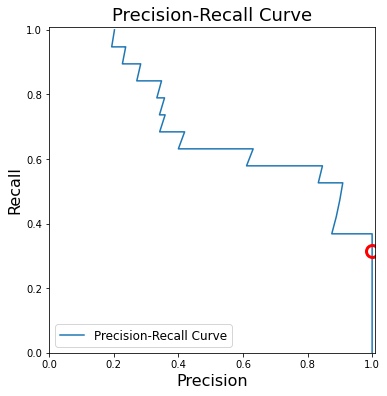

In [3]:
from sklearn.metrics import precision_recall_curve

y_scores = LR_clf.decision_function(X_valid)
precision, recall, thresholds = precision_recall_curve(y_valid, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(6, 6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title('Precision-Recall Curve', fontsize=18)
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.axes().set_aspect('equal')
plt.show()

### F1 score
F1-score is used when you want to seek a balance between precision and recall. It is the [Harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) between precision and recall. 

$$ F1 = 2 * \frac{1}{\frac{1}{Precision} + \frac{1}{Recall}} = 2 * \frac{Precision * Recall}{Precision + Recall} $$.

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_valid, y_predicted)
precision = precision_score(y_valid, y_predicted)
recall = recall_score(y_valid, y_predicted)
f1 = f1_score(y_valid, y_predicted)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.86
Precision: 1.0
Recall: 0.2631578947368421
F1: 0.4166666666666667


### Area Under ROC curve:

ROC (Receiver Operating Characteristic) curve tells us how good is a classifier in **predicting the difference between two classes**. The binary classifier usually outputs the probability that an observation belongs to the positive class. If the probabilities for most observations are closer to 0 or 1, it is considered good in distinguish the two classes, whereas it is said to perform poorly if most probabilities are closer to 0.5. 

$$\text{True Positive Rate (TPR)} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
= \frac{\text{True Positives (TP)}}{\text{Total Actual Positives}}$$

$$\text{False Positive Rate (FPR)} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP) + True Negatives (TN)}}
= \frac{\text{False Positives (FP)}}{\text{Total Actual Negatives}}$$

* True Positive Rate (TPR) is percentage of positive observations that are classified correctly and we want to maximize it. 
* False Positive Rate (FPR) is percentage of negative observations that are classified incorrectly and we want to minimize it. 

Note that True Positive Rate is same as the recall above, but False Positive Rate is entirely different from the precision, as discussed below. 

ROC curve is calculated by plotting the True Positive Rate vs False Positive Rate for various threshold values for the probability. The area under ROC curve is used as a measure of how well the classifier distinguish between positive and negative classes. The greater the area, the better is the classifier. 

The lesser the overlap, the fewer the false positives and false negatives and higher the AUC ROC score. 

![](https://cdn-images-1.medium.com/max/2000/1*AgDJbm6d8qr8ESHNv6VvKg.png)
![](https://cdn-images-1.medium.com/max/2000/1*KNhNw8BsjbIETPF_BH8Qpg.png)

Note: In all the examples illustrated here, the positive and negative classes are more or less balanced.

The points on the ROC curve represents True Positive Rate and False Positive Rate for different values of the threshold for probability. When we decrease the threshold to correctly classify the positive observations and thereby increase True Positive Rate, we end up increasing False Positive Rate by misclassifying some negative observations as positives. 

The following gif illustrates how moving the decision thresholds corresponds to the points in the ROC curve. 'Sensitivity' in the graph is another word for the True Positive Rate (or the recall).

![](https://www.spectrumnews.org/wp-content/uploads/2016/08/fig-2-1.gif)

The area under the ROC curve is inversely proportional to the overlap between the probabilities for the two classes as predicted by the classifier. The following gif shows how the curve changes with the overlap in the classes.

![](https://www.spectrumnews.org/wp-content/uploads/2016/08/fig-3-1.gif)

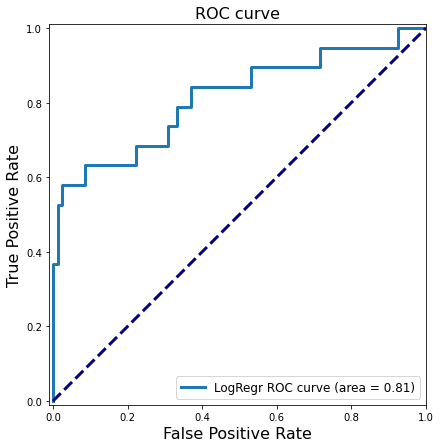

In [5]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_valid, y_scores)
roc_auc_lr = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Comparing Precision-Recall  and ROC curve:

Both the Precision-Recall  and ROC curves try to capture the trade-off between false positives and false negatives. True Positive Rate is nothing but the accuracy of the positive class whereas False Positive Rate measures the inaccuracy of the negative class. Thus, ROC curve studies the trade-off between the accuracy of two classes without weighing one class over the other. Precision-recall curve is [preferable](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) to ROC curve in case of imbalanced classes. Precision-recall curve focuses on two aspects - how accurately and completely do we classify the positive class? **Precision and/or recall are useful when our dataset contains fewer positive examples and we are more concerned about accurately and/or completely classifying them.**

In the confusion matrix, the two horizontal ellipsis corresponds to TPR (or recall) and FPR whereas the vertical one corresponds to Precision.

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/Binary_confusion_matrix.png?raw=true)

* Black: Precision
* Purple: Recall and True Positive Rate (TPR)
* Pink: False Positive Rate (FPR)

Note: The arrangement of rows and columns in this matrix is different from the one at the top. Scikit-learn follows the convention of the matrix at the top.

The formulations for quick reference:

$$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}}
= \frac{\text{True Positives (TP)}}{\text{Total Predicted Positives}}$$

$$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
= \frac{\text{True Positives (TP)}}{\text{Total Actual Positives}}$$

$$\text{True Positive Rate (TPR)} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
= \frac{\text{True Positives (TP)}}{\text{Total Actual Positives}}$$

$$\text{False Positive Rate (FPR)} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP) + True Negatives (TN)}}
= \frac{\text{False Positives (FP)}}{\text{Total Actual Negatives}}$$

### Acknowledgements:
The credits for the images used above are as follows.
- Image 1: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
- Image 2: https://i.stack.imgur.com/W7I4r.png
- Image 3, 6 and 7: https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
- Image 4: https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
- Image 5: https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/confusion-matrix-precision-recall-tradeoff/
- Image 8 and 9: https://www.spectrumnews.org/opinion/viewpoint/quest-autism-biomarkers-faces-steep-statistical-challenges/
- Image 10: https://en.wikipedia.org/wiki/File:Binary_confusion_matrix.png